# Compare space charge vs. no space charge

In [7]:
import sys
import os
from pprint import pprint

import numpy as np
from matplotlib import pyplot as plt
import proplot as pplt
from tqdm import tqdm

sys.path.append('/Users/46h/Research/')
from scdist.tools import beam_analysis as ba
from scdist.tools import plotting as myplt
from scdist.tools import utils

In [8]:
pplt.rc['grid.alpha'] = 0.05
pplt.rc['axes.grid'] = False
pplt.rc['figure.facecolor'] = 'white'
format_kws = dict(ygrid=True, xgrid=False)
savefig_kws = dict(dpi=300)

## Load data

In [ ]:
turns = np.loadtxt('_output/data/turns.dat').astype(int)
print(turns)

frames = list(range(len(turns)))

In [ ]:
intensities = np.loadtxt('_output/data/intensities.dat')
print(intensities)

In [ ]:
file = open('_output/data/rec_node_names.txt', 'r')
rec_node_names = [line.rstrip() for line in file]
file.close()

In [ ]:
rec_node_positions = np.loadtxt('_output/data/rec_node_positions.dat')

Load the simulated moments at each node.

In [ ]:
Sigmas_lists = dict()
stats_lists = dict()

for space_charge in [True, False]:
    Sigmas_list = []
    for frame in frames:
        Sigmas = np.load('_output/data/Sigmas_sim_{}_sc{}.npy'.format(frame, space_charge))
        Sigmas_list.append(Sigmas)
    stats_list = []
    for Sigmas in Sigmas_list:
        moments = np.array([utils.mat2vec(Sigma) for Sigma in Sigmas])
        stats = ba.BeamStats()
        stats.read_moments(moments)
        stats_list.append(stats)
    Sigmas_lists[space_charge] = Sigmas_list
    stats_lists[space_charge] = stats_list

In [11]:
kws = dict(color='black')
kws_sc = dict(color='red', lw=0, marker='.', ms=2)
# rec_kws = dict(color='red', ls='dotted')
labels = [
    r"$\langle{xx}\rangle$",
    r"$\langle{xx'}\rangle$",
    r"$\langle{xy}\rangle$",
    r"$\langle{xy'}\rangle$",
    r"$\langle{x'x'}\rangle$",
    r"$\langle{x'y}\rangle$",
    r"$\langle{x'y'}\rangle$",
    r"$\langle{yy}\rangle$",
    r"$\langle{yy'}\rangle$",
    r"$\langle{y'y'}\rangle$",
]

In [ ]:
_frames = [1, 3, 5, 7]
fig, axes = pplt.subplots(nrows=10, ncols=len(_frames), figsize=(7, 9), spany=False, aligny=True)
for j, frame in enumerate(_frames):    
    stats_sc = stats_lists[True][j]
    stats = stats_lists[False][j]        
    turn = turns[frame]
    axes[0, j].set_title('Turn {}'.format(turn))
    for i, ax in enumerate(axes[:, j]):
        ax.plot(rec_node_positions[:, 0], stats.moments.iloc[:, i].values, **kws)
        ax.plot(rec_node_positions[:, 0], stats_sc.moments.iloc[:, i].values, **kws_sc)
for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(labels[i])
axes.format(suptitle='Second-order moments', xlabel='Position [m]')
plt.savefig('_output/figures/compare_sc_moments.png', **savefig_kws)
plt.show()

In [ ]:
_frames = [1, 3, 5, 7]
fig, axes = pplt.subplots(nrows=10, ncols=len(_frames), figsize=(7, 9), spany=False, aligny=True)
for j, frame in enumerate(_frames):    
    stats_sc = stats_lists[True][j]
    stats = stats_lists[False][j]        
    turn = turns[frame]
    axes[0, j].set_title('Turn {}'.format(turn))
    for i, ax in enumerate(axes[:, j]):
        ax.plot(rec_node_positions[:, 0], stats.corr.iloc[:, i].values, **kws)
        ax.plot(rec_node_positions[:, 0], stats_sc.corr.iloc[:, i].values, **kws_sc)
for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(labels[i])
axes.format(suptitle='Correlation coefficients', xlabel='Position [m]')
plt.savefig('_output/figures/compare_sc_corr.png', **savefig_kws)
plt.show()

In [28]:
Sigmas1 = np.load('_output/data/Sigmas_-1_scFalse.npy')
Sigmas2 = np.load('_output/data/Sigmas_-1_scTrue.npy')
stats1 = ba.BeamStats()
stats1.read_cov(Sigmas1)
stats2 = ba.BeamStats()
stats2.read_cov(Sigmas2)

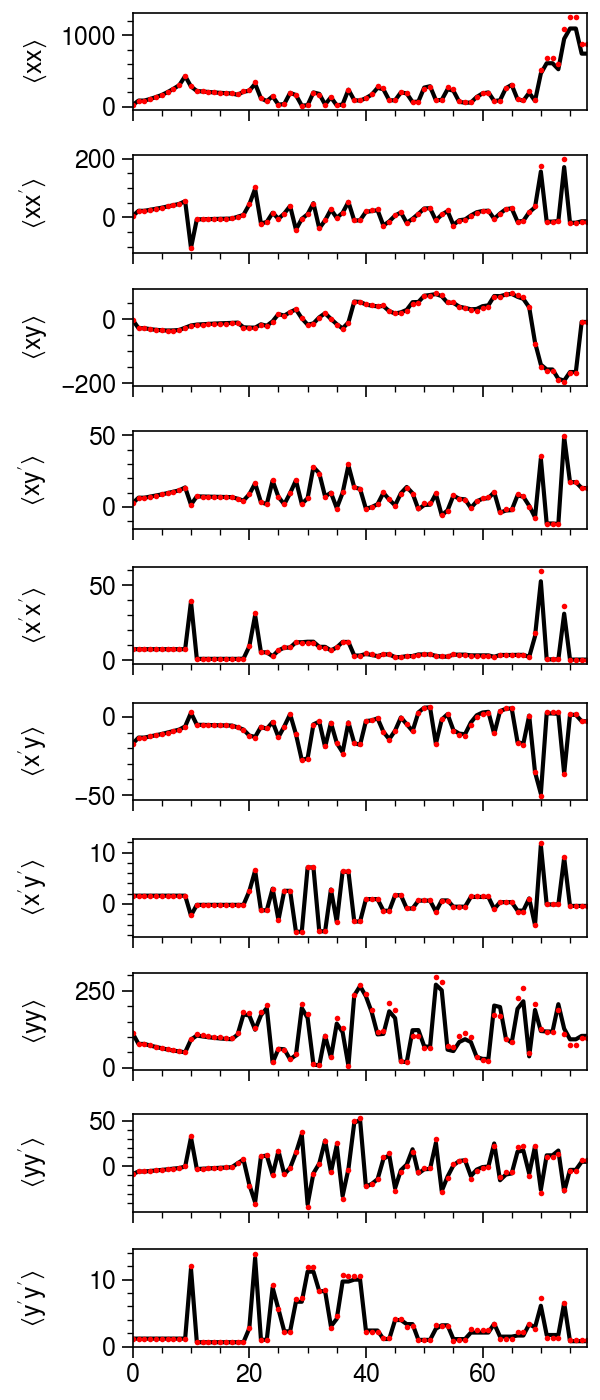

In [30]:
fig, axes = pplt.subplots(nrows=10, figsize=(3, 7), spany=False, aligny=True)
for i, ax in enumerate(axes):    
    ax.plot(stats1.moments.values[:, i], **kws)
    ax.plot(stats2.moments.values[:, i], **kws_sc)
#     error = stats1.moments.values[:, i] - stats2.moments.values[:, i]
#     ax.plot(error, color='black')
for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(labels[i])
plt.show()